In [3]:
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from openpyxl.styles import Font, Side, Border
from calculate import Math
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

separate_jtz.xlsx


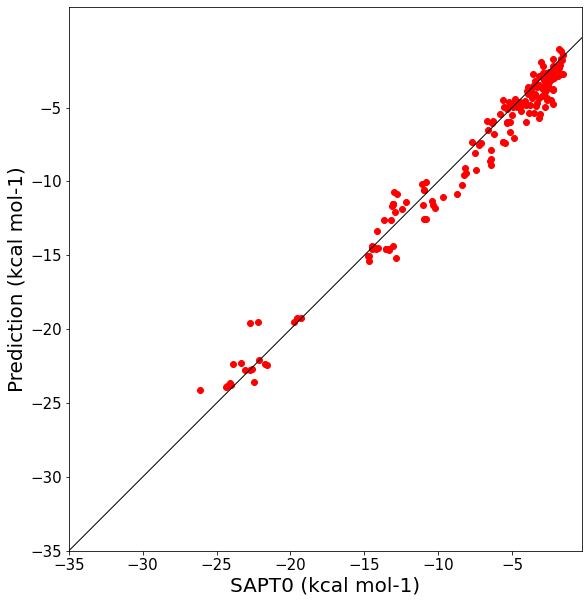

<Figure size 720x720 with 0 Axes>

194
1
MAE:  0.8330104712041883
RMSE:  1.0649381984378936
R2:  0.9723501373498923


In [9]:
p = './result/'
fileNameList = os.listdir(p)
leg = []
label = []
Allref, Allpred = [], []
ij = 0
ijk = 0
for file in fileNameList:
    if file != 'separate_jtz.xlsx':
        continue
    print(file)
    ijk += 1
    path = os.path.join(p, file)
    wb = load_workbook(path)
    sheet = wb['total']
    start = 2
    dat=[]
    while True:
        if sheet.cell(row=start, column=1).value == None:
            break
        elif sheet.cell(row=start, column=4).value == 0:
            start += 1
            ij += 1
            continue
        da = []
        for col in range(2,4):
            val = sheet.cell(row=start, column=col).value
            if val > 0:
                print(val,file ,col, start)
            da.append(sheet.cell(row=start, column=col).value)
        dat.append(da)
        start += 1
        ij += 1
    dat = np.array(dat)
    ref = dat[:,0]
    pred = dat[:,1]
    #print(ref, pred)
    for i in range(len(ref)):
        Allref.append(ref[i])
        Allpred.append(pred[i])
    #i += 1
    leg.append(plt.scatter(ref, pred, label=file[:-11], color='r'))
    label.append(file[:-5])

plt.xlabel("SAPT0 (kcal mol-1)", fontsize=20)
plt.ylabel("Prediction (kcal mol-1)", fontsize=20)
plt.axis("square")  
x_ticks = np.arange(-35, 0, 5)
y_ticks = np.arange(-35, 0, 5)
plt.xticks(x_ticks,fontsize=15)
plt.yticks(y_ticks,fontsize=15)
slash = np.arange(-35, 5)
#plt.legend(leg, label, loc='lower right', borderpad=5)
plt.plot(slash,slash,color='k',linewidth=1,zorder=2)
plt.figure(figsize=(10,10))
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()
print(ij)
print(ijk)
print('MAE: ', mean_absolute_error(Allref, Allpred))
print('RMSE: ', mean_squared_error(Allref, Allpred, squared=False))
print('R2: ', r2_score(Allref, Allpred))

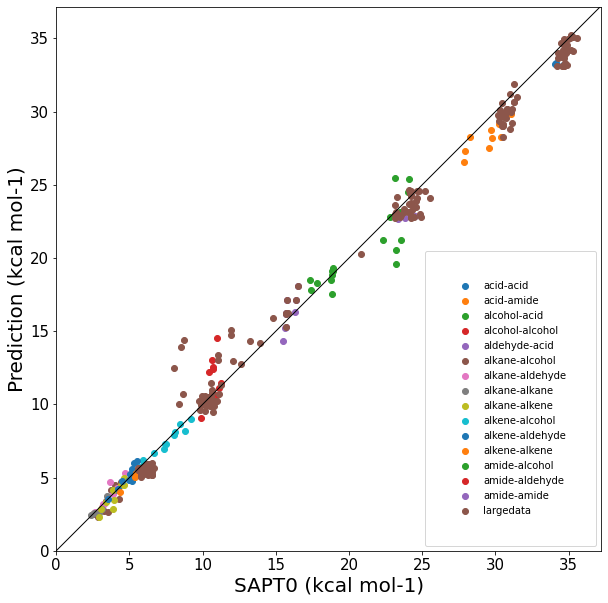

<Figure size 1080x1080 with 0 Axes>

MAE:  0.7374845360824742
RMSE:  1.0778800658821541
R2:  0.9901575590777424


In [5]:
p = './result/'
fileNameList = os.listdir(p)
leg = []
label = []
Allref, Allpred = [], []
for file in fileNameList:
    if file[-10:] == 'dimer.xlsx':
        continue
    path = os.path.join(p, file)
    wb = load_workbook(path)
    sheet = wb['exc']
    j = 1
    while True:
        if sheet.cell(row=j, column=1).value != None:
            start = j
            break
        j += 1
    dat = []
    while True:
        if sheet.cell(row=start, column=1).value == None:
            break
        da = []
        for col in range(3,5):
            da.append(sheet.cell(row=start, column=col).value)
        dat.append(da)
        start += 1
    dat = np.array(dat)
    ref = dat[:,0]
    pred = dat[:,1]
    #i += 1
    leg.append(plt.scatter(ref, pred, label=file[:-11]))
    label.append(file[:-5])
    for i in range(len(ref)):
        Allref.append(ref[i])
        Allpred.append(pred[i])

plt.xlabel("SAPT0 (kcal mol-1)", fontsize=20)
plt.ylabel("Prediction (kcal mol-1)", fontsize=20)
plt.axis("square")  
x_ticks = np.arange(0, 40, 5)
y_ticks = np.arange(0, 40, 5)
plt.xticks(x_ticks,fontsize=15)
plt.yticks(y_ticks,fontsize=15)
slash = np.arange(0, 40)
plt.legend(leg, label, loc='lower right', borderpad=3)
plt.plot(slash,slash,color='k',linewidth=1,zorder=2)
plt.figure(figsize=(15,15))
plt.rcParams['figure.figsize'] = [12, 12]
plt.show()
print('MAE: ', mean_absolute_error(Allref, Allpred))
print('RMSE: ', mean_squared_error(Allref, Allpred, squared=False))
print('R2: ', r2_score(Allref, Allpred))

In [ ]:
import preprocessData
import calculate
from calculate import Math
import resultData
import numpy as np
import database
import sys
import os

In [ ]:
allEnergy = []
dis = []
for file in preprocessData.dataName():
    print(file)
    try:
        if file[-3:] == 'out':
            allEnergy.append(preprocessData.getOutputData.dataEnergy(file))
            dis.append(float(file[-6:-4])/10)
        else:
            struct.append(preprocessData.getIntputData.dataStructure(file))
    except:
        print('File format error.')
        sys.exit()
print(dis)

In [ ]:
allEnergy = np.array(allEnergy)
elst = allEnergy[:,3]
elst

In [ ]:
plt.plot(dis, elst)
# plt.plot([4 for i in range(7)], np.arange(0,-7,-1), color='r')
# plt.plot([3 for i in range(7)], np.arange(0,-7,-1), color='y')
# plt.plot([5 for i in range(7)], np.arange(0,-7,-1), color='y')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Edisp(kcal/mol)", fontsize=15)
plt.title("Dispersion energy", fontsize=15)
plt.show()